In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


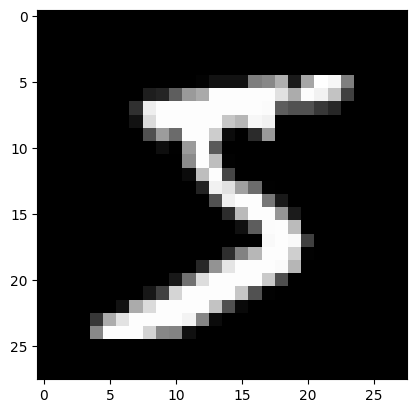

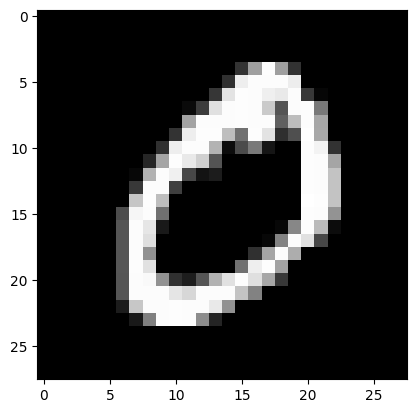

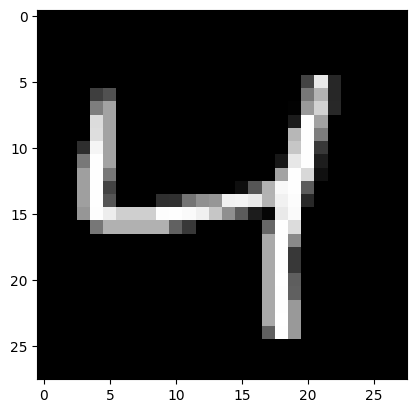

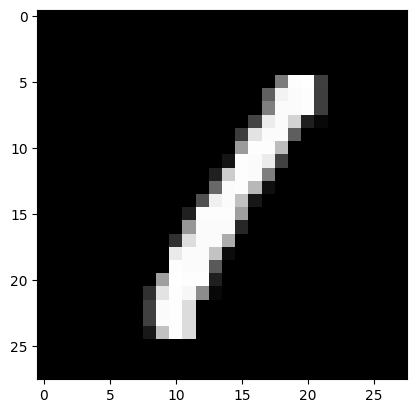

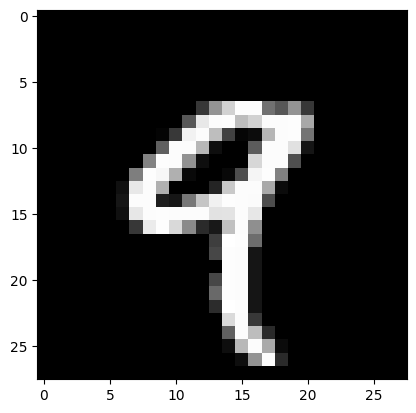

In [ ]:
for i in range(5):
    plt.imshow(x_train[i], cmap='gray')
    plt.show()

In [ ]:
for i in range(5):
    print(y_train[i])

5
0
4
1
9


In [ ]:
print(x_train[5])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  13  25 100
  122   7   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  33 151 208 252 252
  252 146   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  40 152 244 252 253 224 211
  252 232  40   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  15 152 239 252 252 252 21

**Normalizacija**

In [ ]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

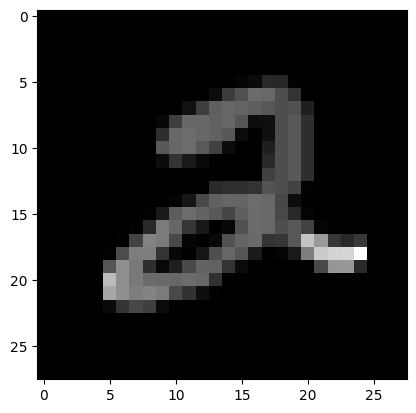

In [ ]:
plt.imshow(x_train[5], cmap='gray')
plt.show()

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

**Model**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Kompajliranje**

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

**Treniranje**

In [ ]:
train = model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 33ms/step - accuracy: 0.8900 - loss: 0.3483
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 31ms/step - accuracy: 0.9823 - loss: 0.0570
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.9893 - loss: 0.0350


**Evaluacija**

In [ ]:
loss, accurancy = model.evaluate(x_test, y_test)
print(loss)
print(accurancy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9860 - loss: 0.0422
0.03424052149057388
0.9883999824523926


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


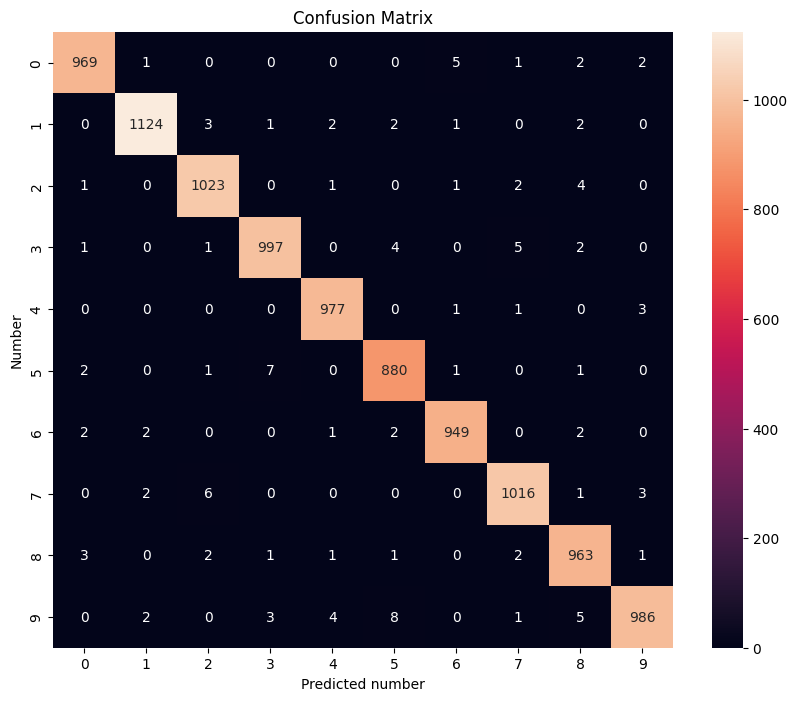

In [ ]:
prediction = model.predict(x_test)
prediction_label = np.argmax(prediction, axis=1)

matrix = tf.math.confusion_matrix(y_test, prediction_label)

plt.figure(figsize=(10,8))
sns.heatmap(matrix, annot=True, fmt="d")
plt.xlabel("Predicted number")
plt.ylabel("Number")
plt.title("Confusion Matrix")
plt.show()

**Testiranje**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


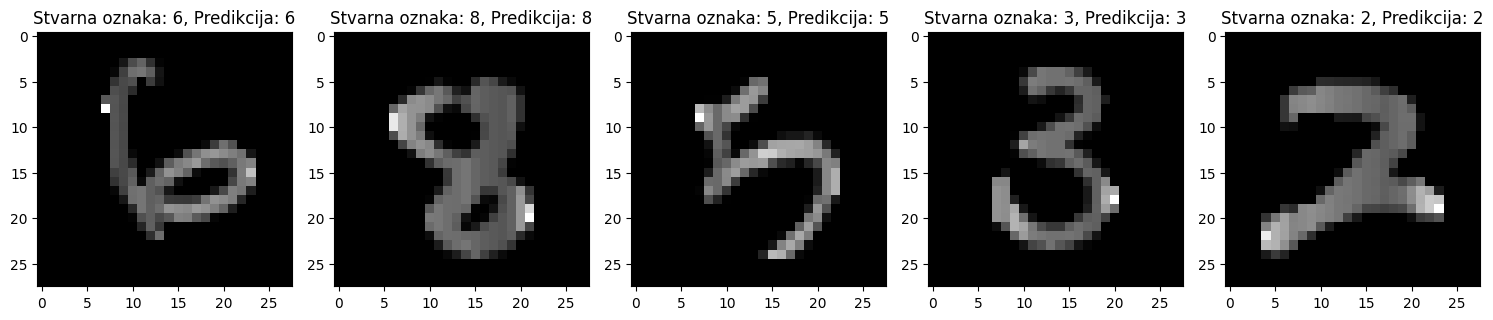

In [ ]:
import random

random_index = np.random.choice(len(x_test), 5)

image = x_test[random_index]
label = y_test[random_index]

prediction = model.predict(image)
prediction_label = np.argmax(prediction, axis=1)

plt.figure(figsize=(15, 3))

for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(image[i].squeeze(), cmap='gray')
    plt.title(f"Stvarna oznaka: {label[i]}, Predikcija: {prediction_label[i]}")

plt.tight_layout()
plt.show()
